<h1>Parameter space exploration</h1>

In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
%matplotlib nbagg

import os, sys
root_dir = os.path.dirname(os.path.abspath(''))
if not root_dir in sys.path: sys.path.append(root_dir)
from DM_theory import *

<IPython.core.display.Javascript object>


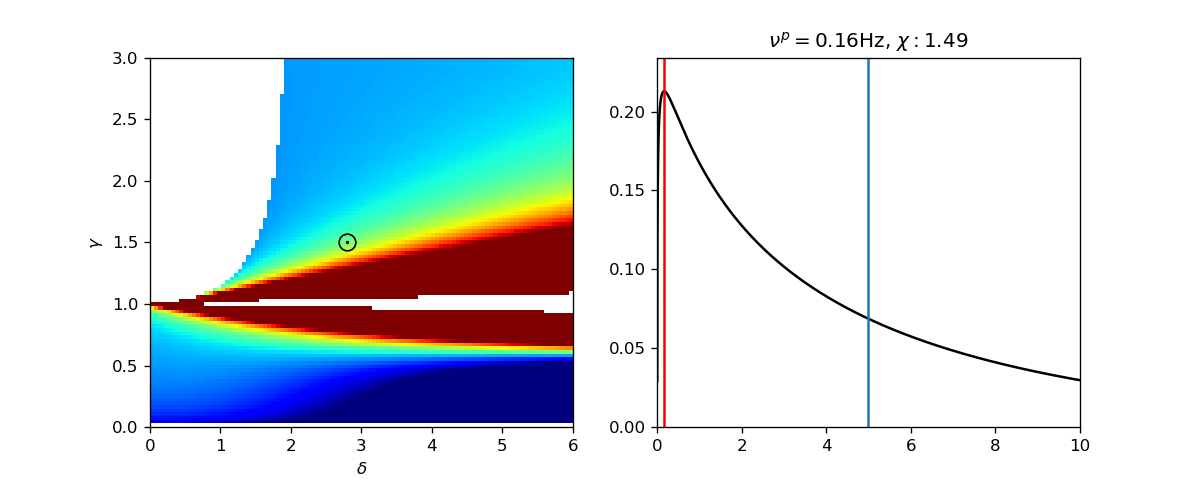

/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/DM_theory/functions.py:12: RuntimeWarning: invalid value encountered in sqrt
  return nu_max * np.exp( - (gamma**2 * delta**2 - 2*(gamma**2 - 1) + gamma * delta *np.sqrt(gamma**2 * delta**2 - 4*(gamma**2 - 1))) / (4 * (gamma**2 - 1)**2))
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/DM_theory/functions.py:15: RuntimeWarning: divide by zero encountered in true_divide
  return -np.log10(get_nu_peak(gamma,delta,nu_max)/get_nu_bar(gamma,delta,nu_max))
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/DM_theory/functions.py:15: RuntimeWarning: divide by zero encountered in log10
  return -np.log10(get_nu_peak(gamma,delta,nu_max)/get_nu_bar(gamma,delta,nu_max))
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/DM_theory/functions.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return gamma / ( nu_max * np.sqrt( -np.pi * np.log( NU / nu_max ) ) ) * \


interactive(children=(FloatSlider(value=1.5, description='$\\displaystyle \\gamma$', max=3.0, step=0.01), Floa…

In [2]:
gamma = 1.5
delta = 2.5

fig,ax = plt.subplots(1,2,figsize=(10,4))

delta_range = [0,6]
gamma_range = [0,3]
nu_max = 20.

chi = create_phaseSpace(steps=101,gamma_range=gamma_range,delta_range=delta_range,nu_max=nu_max)

chi_plt = ax[0].imshow(chi,origin='lower',extent=[*delta_range,*gamma_range],aspect='auto',cmap='jet',vmin=-2,vmax=5)
plt.setp(ax[0],
         xlabel='$\delta$',
         ylabel=r'$\gamma$'
)

global init 
init = True
arr_steps = 10001
pos, = ax[0].plot(delta,gamma,'ok',ms=10,fillstyle='none')
pos_in, = ax[0].plot(delta,gamma,'ok',ms=1)
x_arr = np.linspace(1/arr_steps,nu_max,arr_steps)
distr, = ax[1].plot(x_arr,p_nu(x_arr,gamma,delta,nu_max),'k-')
        
gamma_widget = widgets.FloatSlider(gamma,min=gamma_range[0],max=gamma_range[1],step=0.01,orientation='horizontal',description=r'$\displaystyle \gamma$')
delta_widget = widgets.FloatSlider(delta,min=delta_range[0],max=delta_range[1],step=0.1,orientation='horizontal',description=r'$\displaystyle \delta$')
nu_max_widget = widgets.FloatText(nu_max)

def update_plot(gamma,delta,nu_max):
    
    ## update firing rate distribution
    x_arr = np.linspace(1/arr_steps,nu_max,arr_steps)
    new_distr = p_nu(x_arr,gamma,delta,nu_max)   
    
    chi = get_chi(gamma,delta,nu_max)
    #print(f'chi: {:.2f}'.format(chi))
        
    distr.set_xdata(x_arr)
    distr.set_ydata(new_distr)
    nu_peak = get_nu_peak(gamma,delta,nu_max)
    ax[1].set_title("$\\nu^p = {:.2f}$Hz, $\chi: {:.2f}$".format(nu_peak,chi))
        
    global mean_val, peak_val
    try:
        mean_val.remove()
        peak_val.remove()
    except:
        pass
        
    mean_val = ax[1].vlines(get_nu_bar(gamma,delta,nu_max),0,5)
    peak_val = ax[1].vlines(get_nu_peak(gamma,delta,nu_max),0,5,color='r')
    plt.setp(ax[1],xlim=[0,10],ylim=[0,max(new_distr)*1.1])
    
    pos.set_xdata(delta)
    pos.set_ydata(gamma)
    pos_in.set_xdata(delta)
    pos_in.set_ydata(gamma)
    
    tau_m = 0.01
    tau_I = get_tau_I(nu_max,tau_m=tau_m)
    nu_mean = get_nu_bar(gamma=gamma,delta=delta,nu_max=nu_max)
    alpha_0 = get_alpha_0(gamma,delta,nu_max,tau_m,J_0=-1)
    print(tau_I,nu_mean,alpha_0)
    
    plt.show()
    
widgets.interactive(update_plot,gamma=gamma_widget,delta=delta_widget,nu_max=nu_max_widget)